In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv('economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
# remove the unused columns

df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
import seaborn as sns

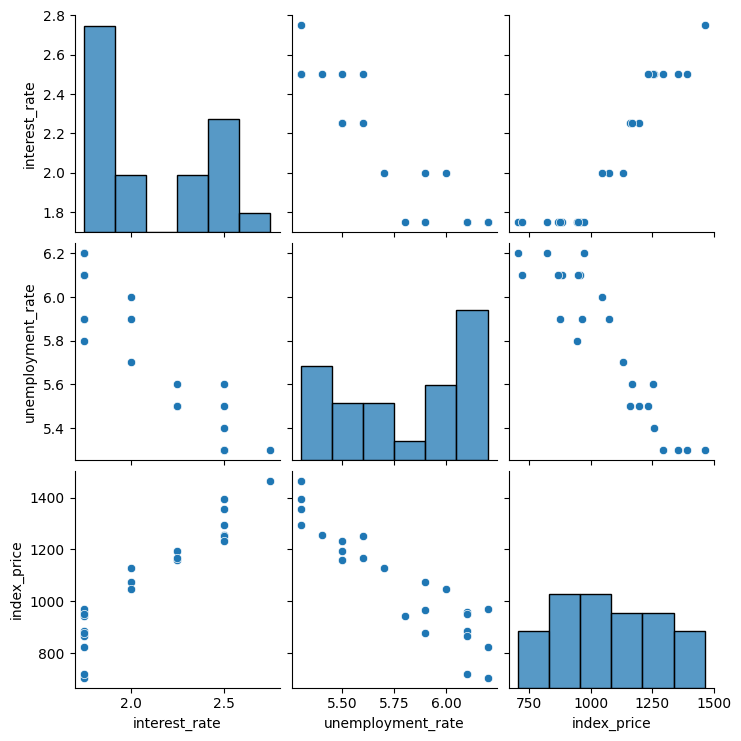

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

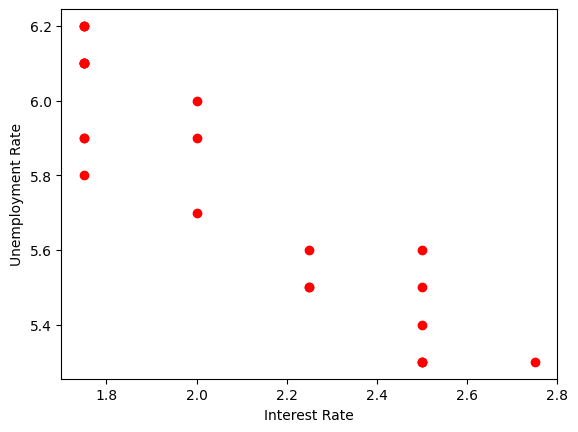

In [14]:
# visualize the datapoints

plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [18]:
# independent and dependent features

x = df[['interest_rate', 'unemployment_rate']]
y = df[['index_price']]
print(x.shape)
print(y.shape)

(24, 2)
(24, 1)


In [20]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [21]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [22]:
# train test split from sklearn

from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

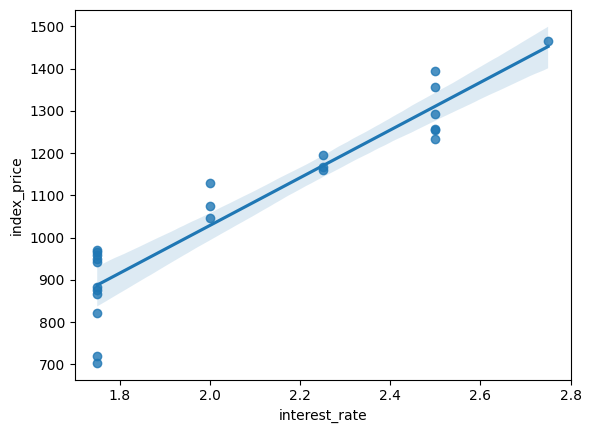

In [27]:
sns.regplot(df, x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

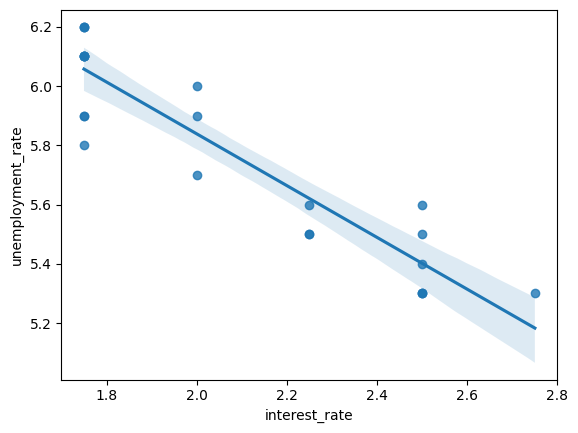

In [28]:
sns.regplot(df, x=df['interest_rate'], y=df['unemployment_rate'])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [33]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(x_train, y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation

validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [41]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [42]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [58]:
# coefficient B0 (slope)

regression.coef_

array([[  88.27275507, -116.25716066]])

In [59]:
# intercept B1

regression.intercept_

array([1053.44444444])

In [43]:
y_pred = regression.predict(x_test)

In [44]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [46]:
from sklearn.metrics import r2_score

In [47]:
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [48]:
# adjusted R-square value of the model

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5985619231683761

#### Assumptions

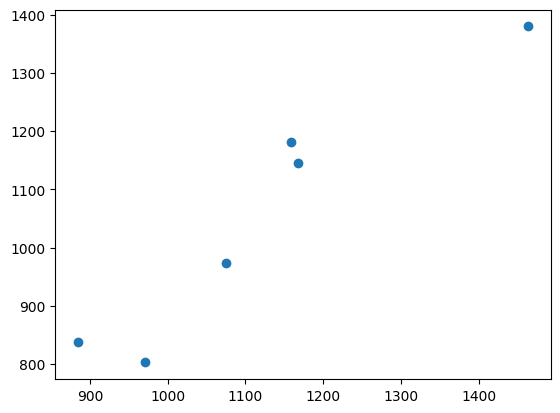

In [49]:
plt.scatter(y_test, y_pred)

In [52]:
residuals = y_test - y_pred
residuals

,index_price
8,-21.746681
16,168.257203
0,84.165430
18,45.474004
11,101.146860
9,22.036518


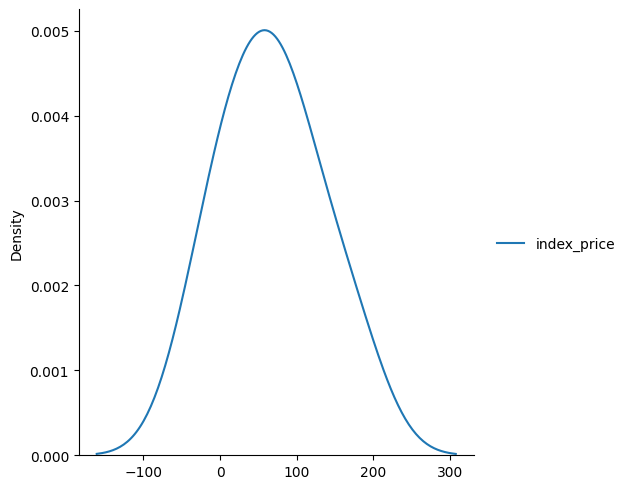

In [53]:
# plot this residuals

sns.displot(residuals, kind='kde')

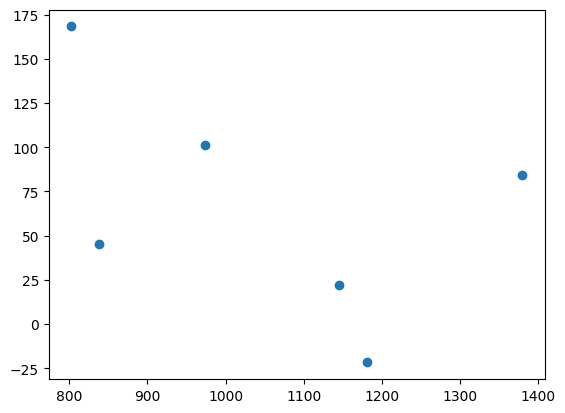

In [54]:
# scatter plot w.r.t prediction and residuals

plt.scatter(y_pred, residuals)

In [55]:
# OLS linear regression

import statsmodels.api as sm

In [56]:
model = sm.OLS(y_train, x_train).fit()

In [57]:
model.summary()

d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                       0.754
Time:                        10:08:33   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""